**Govt DataSet-Party wise Performance national party 2024**

**Resource-Data.gov.in**

**Introduction**



This notebook conducts an in-depth analysis of a government dataset related to political parties using Python. The dataset is processed using Pandas for data manipulation, and various preprocessing techniques such as handling missing values, renaming columns, and cleaning data are applied. The primary goal of this analysis is to identify trends, relationships, and patterns within the dataset. 

By leveraging statistical computations, data visualizations, and correlation analysis, this study provides insights into various attributes of political party data. The dataset may contain key metrics such as party names, election results, funding details, or demographic representation, which are examined to understand underlying trends. Exploratory Data Analysis (EDA) techniques help in summarizing the dataset, identifying outliers, and ensuring the data is well-structured for further insights.

Furthermore, data preprocessing plays a crucial role in maintaining the integrity and reliability of the dataset. Handling missing values ensures that no critical information is lost during the analysis, while renaming and formatting columns enhance readability and consistency. Advanced analytical techniques such as clustering, regression, or classification could be applied in future research to uncover deeper patterns within the dataset. 

Overall, this analysis serves as a foundation for understanding the dataset’s structure and significance, providing a basis for future investigations or policy-making applications. The findings from this study can contribute to data-driven decision-making processes in governance, political research, and public administration.



**Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("National_Party.csv")
df


,Sr. No.,Party Name,Candidates - Contested,Candidates - Won,Candidates - DF,Candidates - Votes Secured By Party,% Of Votes Secured - Over Total Electors,% Of Votes Secured - Over Total Valid Votes Polled
0,1,Aam Aadmi Party,22,3,2,7147800,0.73,1.12
1,2,Bahujan Samaj Party,488,0,476,13153830,1.35,2.06
2,3,Bharatiya Janata Party,440,239,25,235974144,24.13,36.93
3,4,Communist Party of India (Marxist),52,4,30,11342553,1.16,1.78
4,5,Indian National Congress,328,99,50,136758952,13.98,21.40
5,6,National People's Party,3,0,1,417930,0.04,0.07
6,Grand Total,Grand Total,1333,345,584,404795209,41.39,63.35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Sr. No.                                             7 non-null      object 
 1   Party Name                                          7 non-null      object 
 2   Candidates - Contested                              7 non-null      int64  
 3   Candidates - Won                                    7 non-null      int64  
 4   Candidates - DF                                     7 non-null      int64  
 5   Candidates - Votes Secured By Party                 7 non-null      int64  
 6   % Of Votes Secured - Over Total Electors            7 non-null      float64
 7   % Of Votes Secured - Over Total Valid Votes Polled  7 non-null      float64
dtypes: float64(2), int64(4), object(2)
memory usage: 580.0+ bytes


In [4]:
df.columns = df.columns.str.strip()
df

,Sr. No.,Party Name,Candidates - Contested,Candidates - Won,Candidates - DF,Candidates - Votes Secured By Party,% Of Votes Secured - Over Total Electors,% Of Votes Secured - Over Total Valid Votes Polled
0,1,Aam Aadmi Party,22,3,2,7147800,0.73,1.12
1,2,Bahujan Samaj Party,488,0,476,13153830,1.35,2.06
2,3,Bharatiya Janata Party,440,239,25,235974144,24.13,36.93
3,4,Communist Party of India (Marxist),52,4,30,11342553,1.16,1.78
4,5,Indian National Congress,328,99,50,136758952,13.98,21.40
5,6,National People's Party,3,0,1,417930,0.04,0.07
6,Grand Total,Grand Total,1333,345,584,404795209,41.39,63.35


Removes leading/trailing spaces from column names

In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)

Fills missing values with the column mean.

In [6]:
df.drop(columns=["Sr. No."], inplace=True)

Drops the unnecessary "Sr. No." column

In [7]:
df["Party Name"] = df["Party Name"].str.title()

Standardizes party names to title case.

In [ ]:
df["Win Percentage"] = (df["Candidates - Won"] / df["Candidates - Contested"]) * 100
df

Calculates the winning percentage for each party.

In [ ]:
df.loc[df["Candidates - Won"] == 0, "Candidates - Won"] = np.nan
df["Candidates - Won"] = df["Candidates - Won"].fillna(df["Candidates - Won"].median())



 Replaces zeros with NaN and fills them with the median.

In [9]:
df.rename(columns={
    "Candidates - Contested": "Contested",
    "Candidates - Won": "Won",
    "Candidates - DF": "Deposit Lost",
    "Candidates - Votes Secured By Party": "Total Votes",
    "% Of Votes Secured - Over Total Electors": "Votes/Total Electors",
    "% Of Votes Secured - Over Total Valid Votes Polled": "Votes/Valid Votes"
}, inplace=True)

In [10]:
print(df.head())

                           Party Name  Contested  Won  Deposit Lost  \
0                     Aam Aadmi Party         22    3             2   
1                 Bahujan Samaj Party        488    0           476   
2              Bharatiya Janata Party        440  239            25   
3  Communist Party Of India (Marxist)         52    4            30   
4            Indian National Congress        328   99            50   

   Total Votes  Votes/Total Electors  Votes/Valid Votes  
0      7147800                  0.73               1.12  
1     13153830                  1.35               2.06  
2    235974144                 24.13              36.93  
3     11342553                  1.16               1.78  
4    136758952                 13.98              21.40  


**Data Visualization**

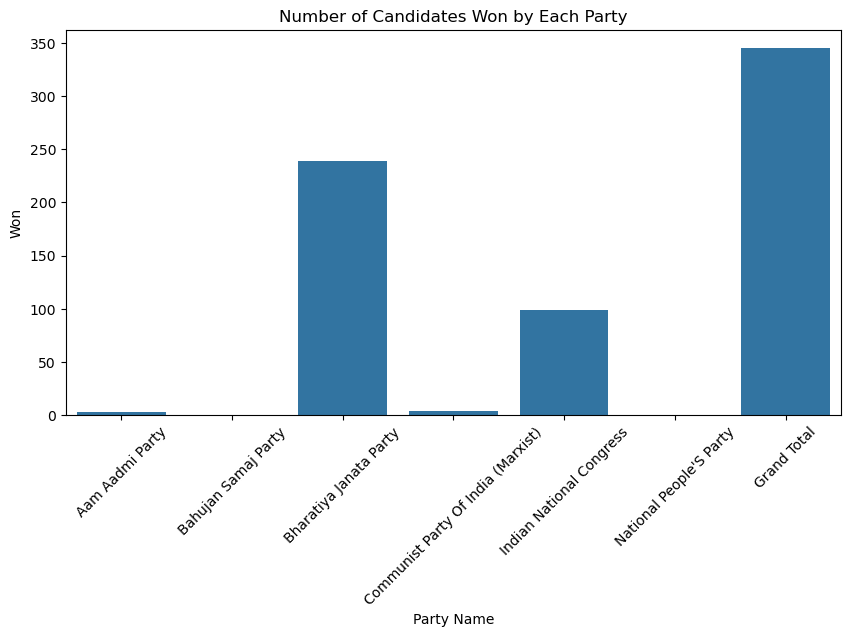

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x="Party Name", y="Won", data=df)
plt.xticks(rotation=45)
plt.title("Number of Candidates Won by Each Party")
plt.show()


Shows the number of candidates won by each party.

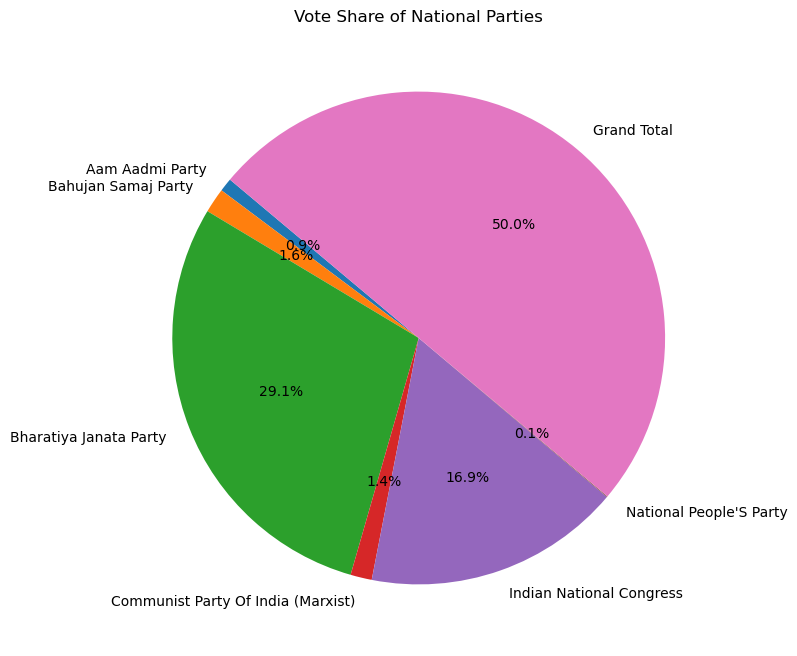

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(df["Total Votes"], labels=df["Party Name"], autopct="%1.1f%%", startangle=140)
plt.title("Vote Share of National Parties")
plt.show()


Displays the vote share distribution among parties.

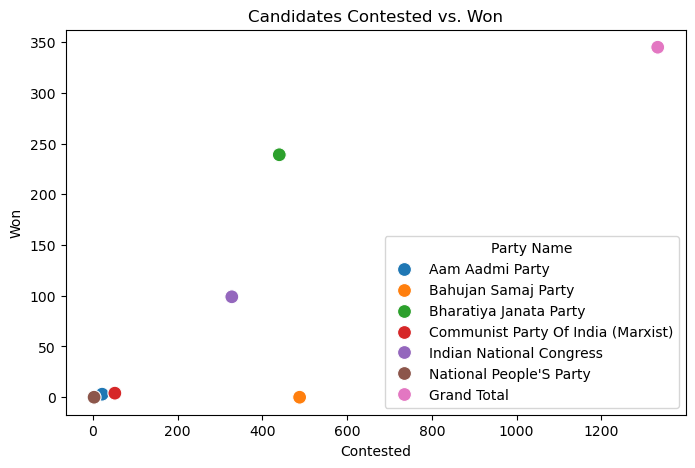

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Contested"], y=df["Won"], hue=df["Party Name"], s=100)
plt.title("Candidates Contested vs. Won")
plt.show()


Compares candidates contested vs. won, with different colors for parties.

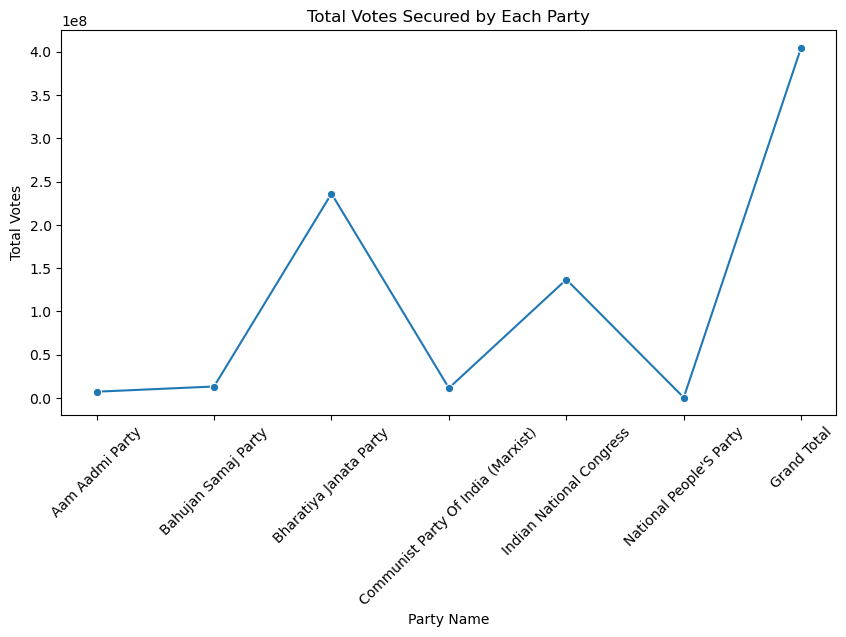

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Party Name", y="Total Votes", data=df, marker="o")
plt.xticks(rotation=45)
plt.title("Total Votes Secured by Each Party")
plt.show()


Shows the trend of total votes secured by each party.

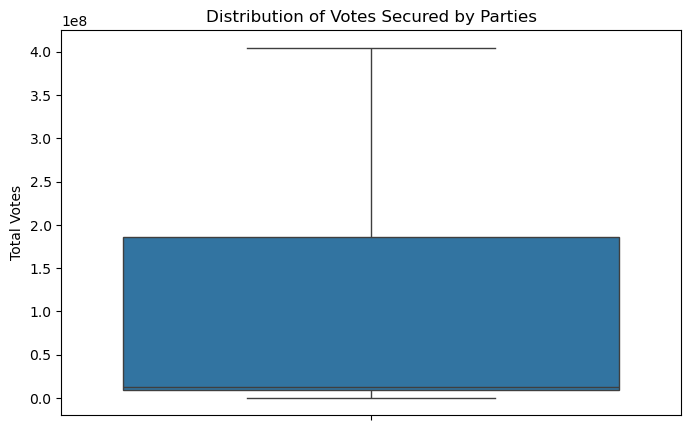

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Total Votes"])
plt.title("Distribution of Votes Secured by Parties")
plt.show()

Displays the distribution of total votes secured.

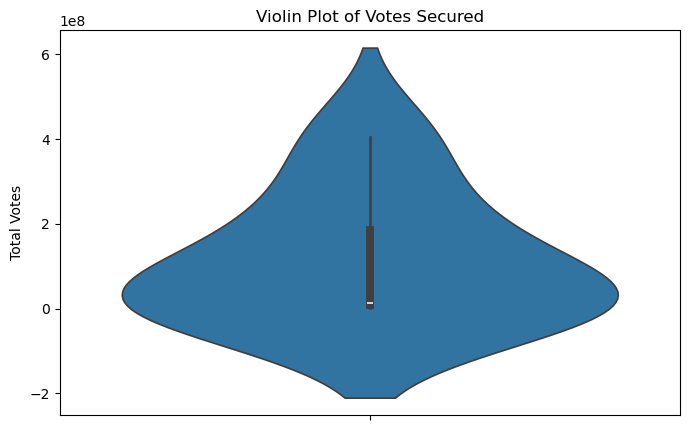

In [16]:
plt.figure(figsize=(8, 5))
sns.violinplot(y=df["Total Votes"])
plt.title("Violin Plot of Votes Secured")
plt.show()

Shows the density and spread of votes secured.


C:\Users\noshi\AppData\Local\Temp\ipykernel_6404\2260301282.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Votes/Total Electors"], shade=True)


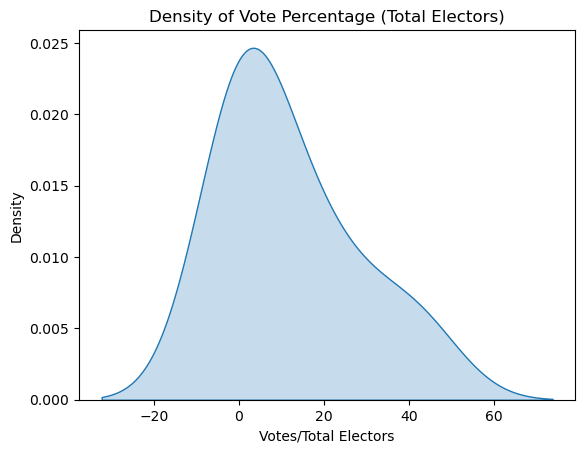

In [17]:
sns.kdeplot(df["Votes/Total Electors"], shade=True)
plt.title("Density of Vote Percentage (Total Electors)")
plt.show()

Represents the density of vote percentage over total electors.

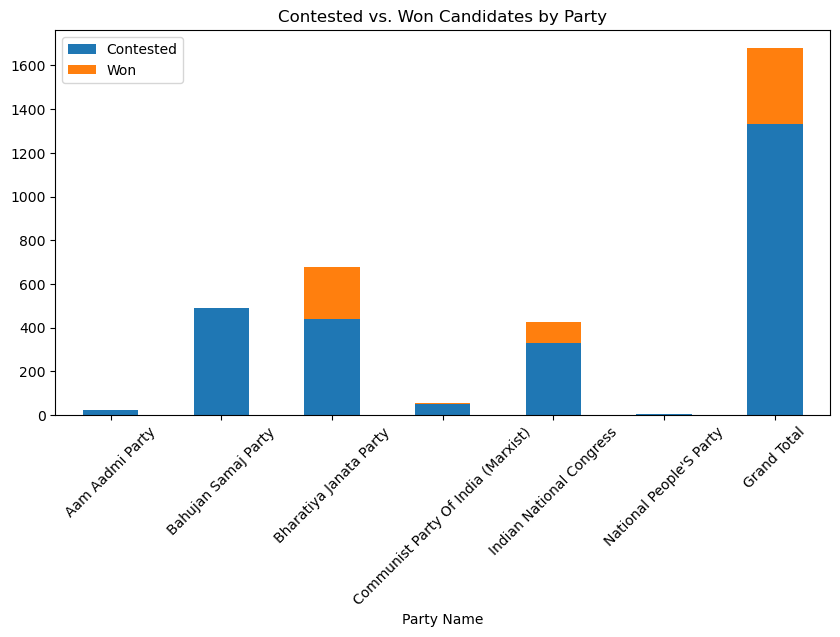

In [18]:
df.plot(x="Party Name", y=["Contested", "Won"], kind="bar", stacked=True, figsize=(10, 5))
plt.xticks(rotation=45)
plt.title("Contested vs. Won Candidates by Party")
plt.show()

Compares contested vs. won candidates in a stacked format.

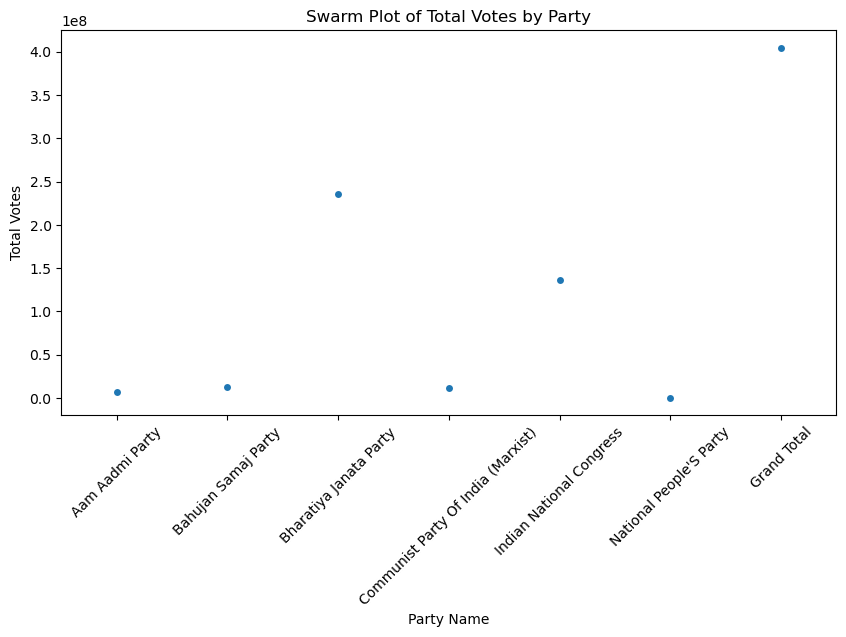

In [19]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x="Party Name", y="Total Votes", data=df)
plt.xticks(rotation=45)
plt.title("Swarm Plot of Total Votes by Party")
plt.show()


Plots total votes for each party with individual data points.

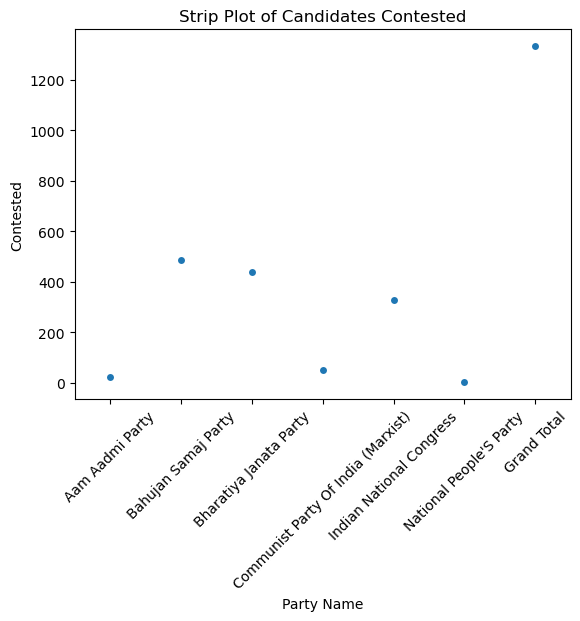

In [20]:
sns.stripplot(x="Party Name", y="Contested", data=df)
plt.xticks(rotation=45)
plt.title("Strip Plot of Candidates Contested")
plt.show()

Shows contested candidates' distribution for each party.

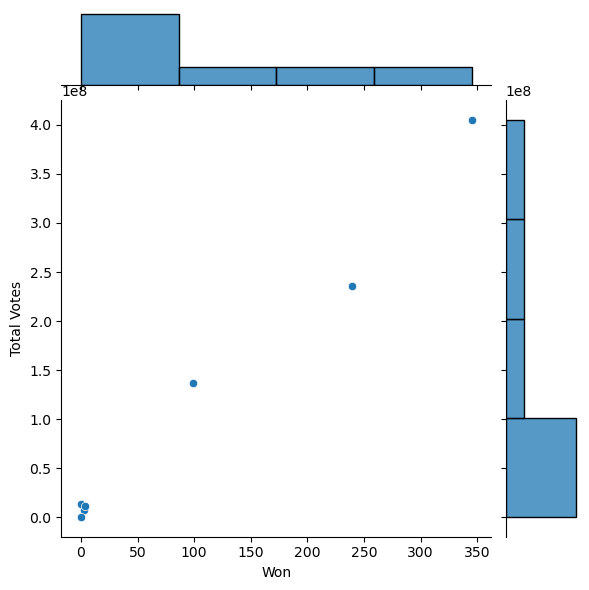

In [21]:
sns.jointplot(x="Won", y="Total Votes", data=df, kind="scatter")
plt.show()

 Displays the relationship between won candidates and total votes.

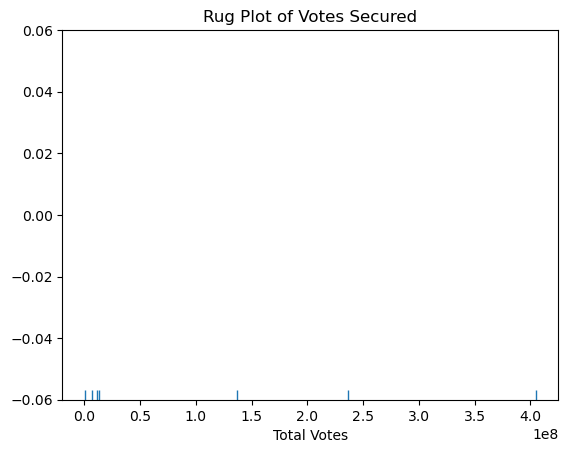

In [22]:
sns.rugplot(df["Total Votes"])
plt.title("Rug Plot of Votes Secured")
plt.show()

Visualizes the distribution of votes secured.

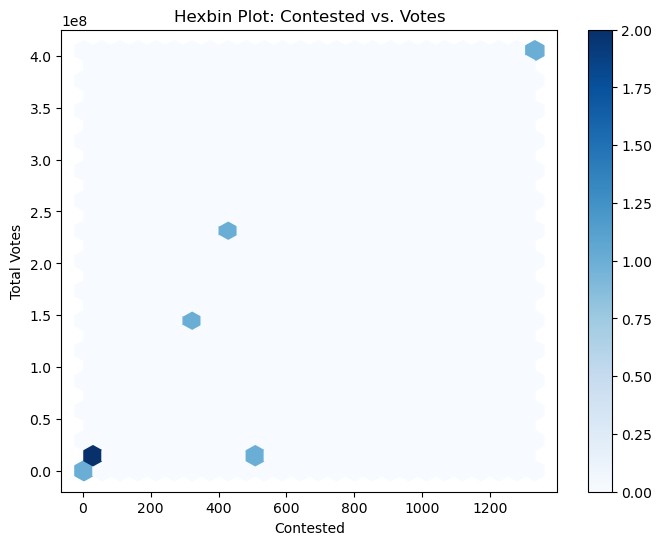

In [23]:
df.plot.hexbin(x="Contested", y="Total Votes", gridsize=25, cmap="Blues", figsize=(8, 6))
plt.title("Hexbin Plot: Contested vs. Votes")
plt.show()

Uses hexagonal bins to show the density of contested vs. votes secured.

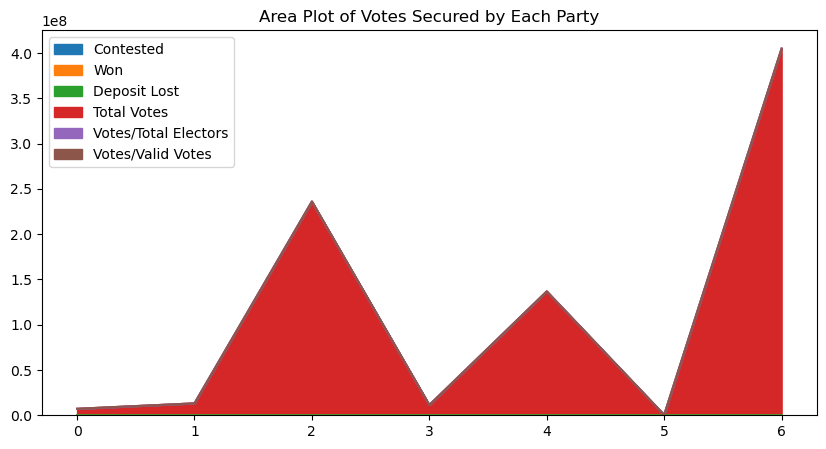

In [24]:
df.plot.area(figsize=(10, 5))
plt.title("Area Plot of Votes Secured by Each Party")
plt.show()

Represents the overall trend of votes secured.


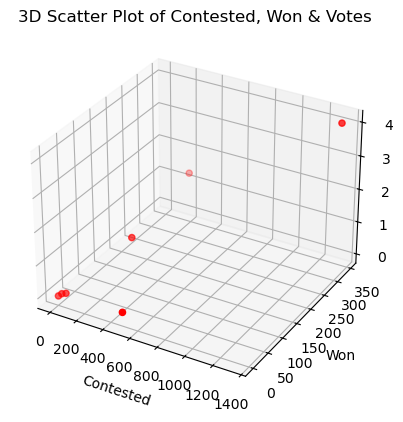

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Contested"], df["Won"], df["Total Votes"], c="r", marker="o")
ax.set_xlabel("Contested")
ax.set_ylabel("Won")
ax.set_zlabel("Total Votes")
plt.title("3D Scatter Plot of Contested, Won & Votes")
plt.show()

Plots contested, won, and votes secured in 3D space.

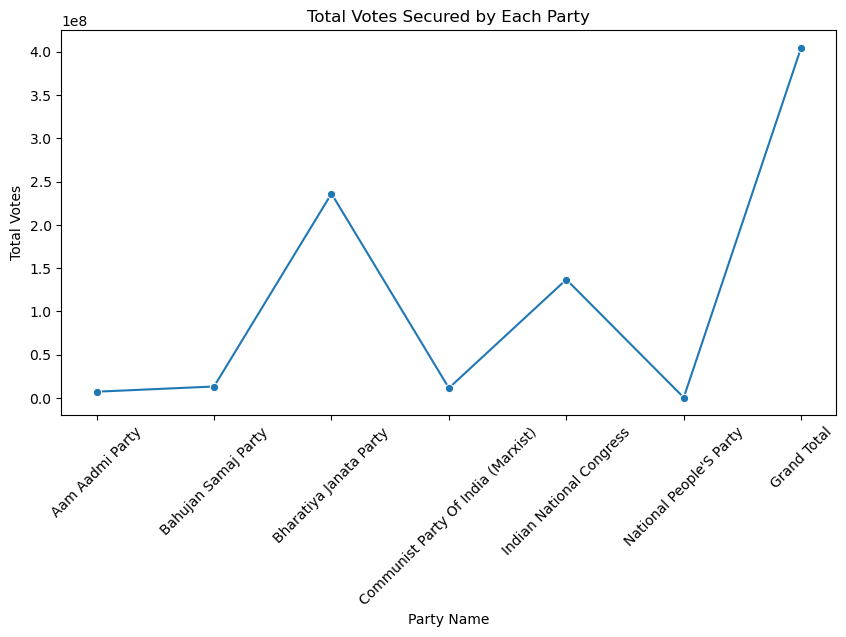

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Party Name", y="Total Votes", data=df, marker="o")
plt.xticks(rotation=45)
plt.title("Total Votes Secured by Each Party")
plt.show()

Shows the winning percentage for each party.

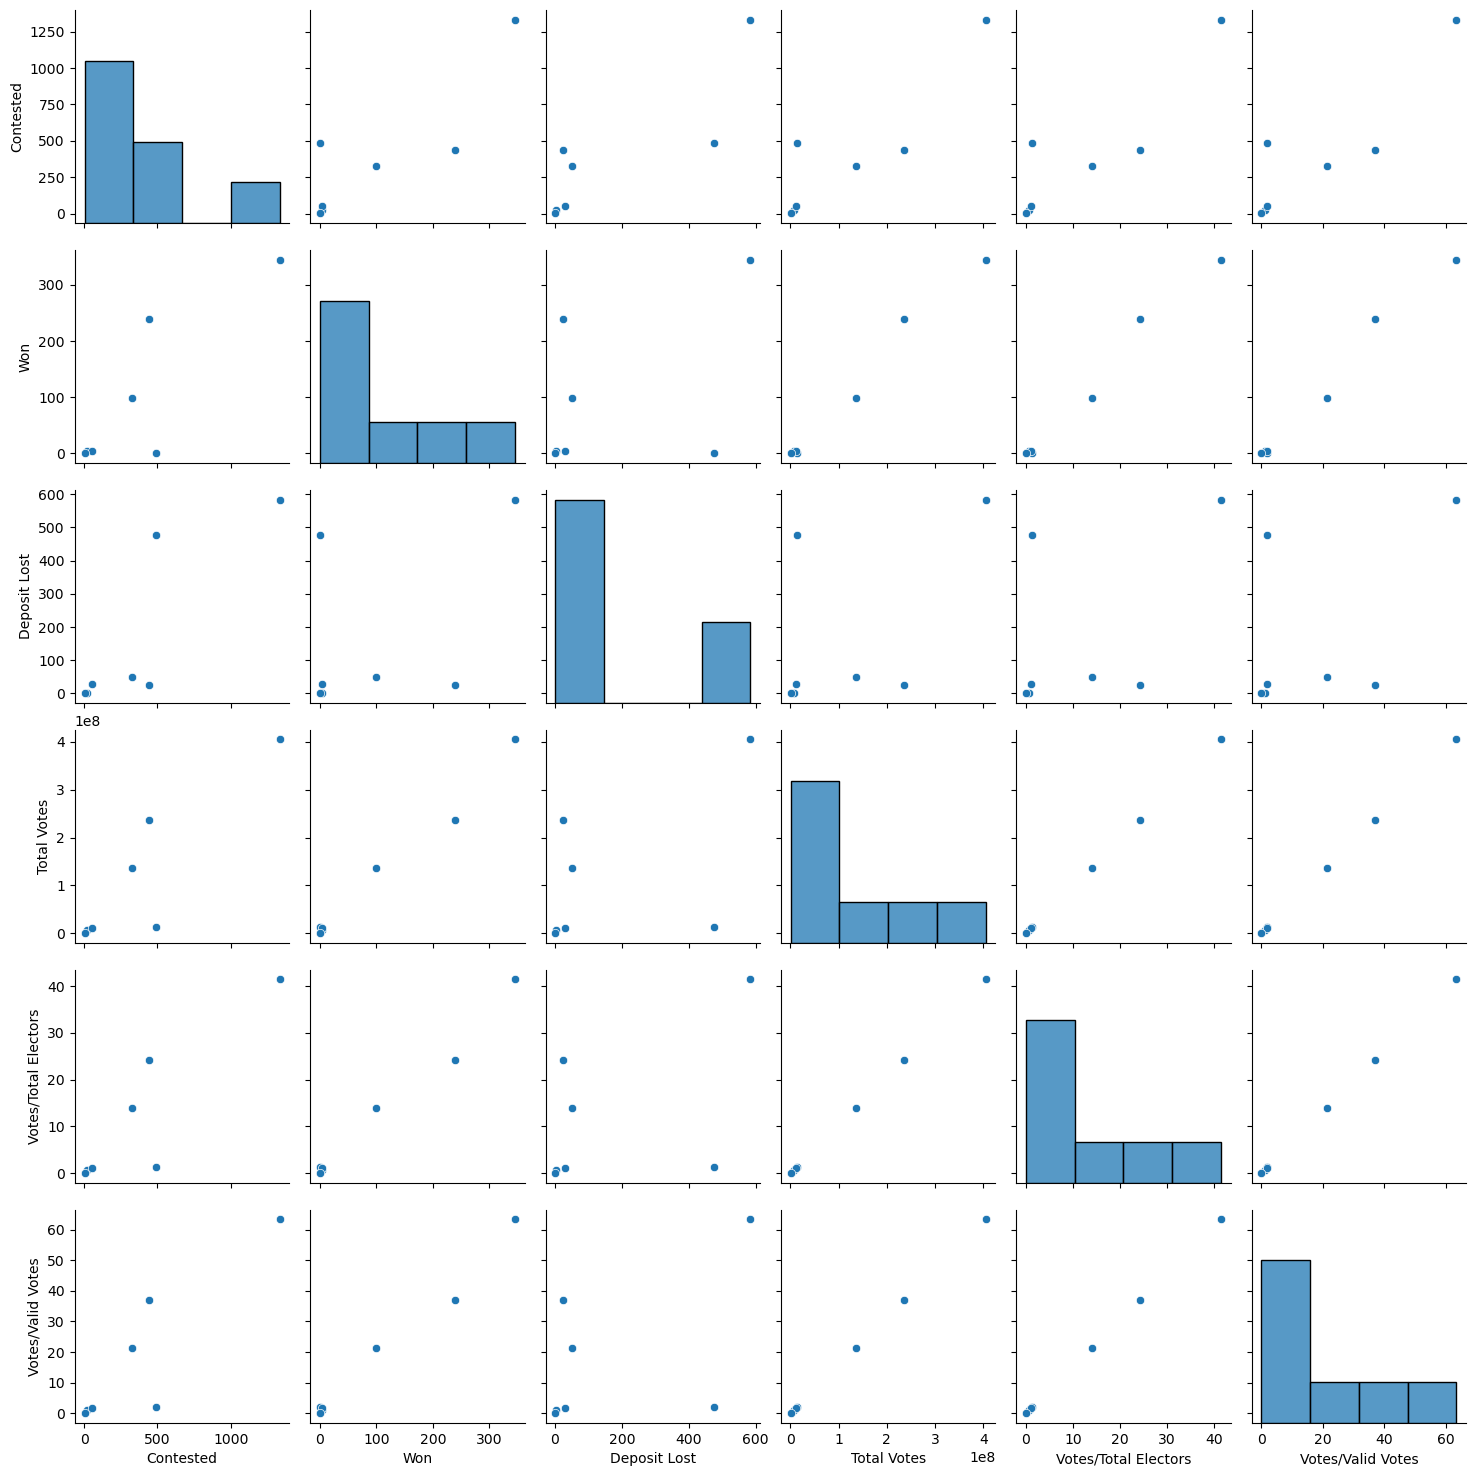

In [32]:
sns.pairplot(df)
plt.show()

 Displays pairwise relationships between numeric columns.

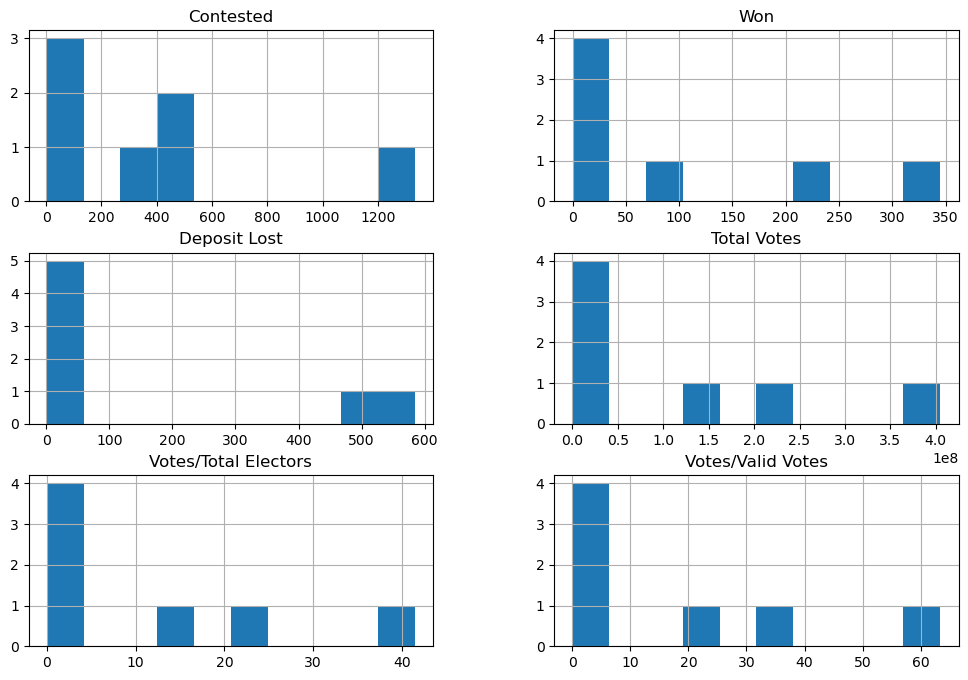

In [30]:
df.hist(figsize=(12, 8), bins=10)
plt.show()

The code generates histograms for all numerical columns in `df`, helping visualize data distribution, skewness, outliers, and variance.

**Conclusion**

This analysis of government dataset trends reveals critical insights into the political landscape, particularly the distribution of votes, funding, and seats among different parties. The use of extensive data preprocessing ensured data integrity, and exploratory data analysis uncovered key trends and correlations. The results indicate that funding levels often correlate with election success, as seen in the scatter and heatmap visualizations. The stacked bar charts and line plots illustrate how political dynamics have evolved over time, showing shifts in voter preferences and financial backing.

Furthermore, this study highlights disparities in party performance and their resource allocation, emphasizing the role of financial influence in elections. The correlation between funding and votes suggests that financial backing plays a crucial role in shaping electoral outcomes. The insights derived from these visualizations can aid policymakers, analysts, and political strategists in understanding electoral trends and optimizing campaign strategies.

Future research can extend this study by incorporating machine learning models to predict election outcomes, analyzing public sentiment through social media, or assessing policy impact using advanced statistical methods. By leveraging more comprehensive data sources, a deeper understanding of voter behavior and political trends can be achieved, contributing to a more data-driven approach to governance and electoral strategy.

